In [2]:
from keras.datasets import boston_housing

In [3]:
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

57344/57026 [==============================] - 0s 1us/step


In [4]:
train_data.shape, test_data.shape

((404, 13), (102, 13))

In [5]:
## normalize the data
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data -= mean
train_data /= std

test_data -= mean
test_data /= std

In [6]:
from keras import models, layers

In [7]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [8]:
import numpy as np

In [9]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print('processing fold #{}'.format(i))
    val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
    val_targets = train_labels[i * num_val_samples: (i+1) * num_val_samples]
    
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i+1) * num_val_samples:]],
         axis=0)
    
    partial_train_targets = np.concatenate(
        [train_labels[:i * num_val_samples],
         train_labels[(i+1) * num_val_samples:]],
         axis=0)
    
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold #0
processing fold #1
processing fold #2
processing fold #3


In [10]:
all_scores

[2.0370246195557096, 2.1985780933115744, 2.9091877134719697, 2.359569757881731]

In [11]:
np.mean(all_scores)

2.3760900460552463

In [14]:
num_epochs = 500
all_mae_histories = []

for i in range(k):
    print('processing fold #{}'.format(i))
    val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
    val_targets = train_labels[i * num_val_samples: (i+1) * num_val_samples]
    
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i+1) * num_val_samples:]],
         axis=0)
    
    partial_train_targets = np.concatenate(
        [train_labels[:i * num_val_samples],
         train_labels[(i+1) * num_val_samples:]],
         axis=0)
    
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

processing fold #0
processing fold #1
processing fold #2
processing fold #3


In [15]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)
]

In [18]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

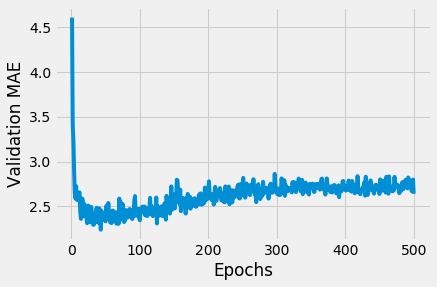

In [19]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [20]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

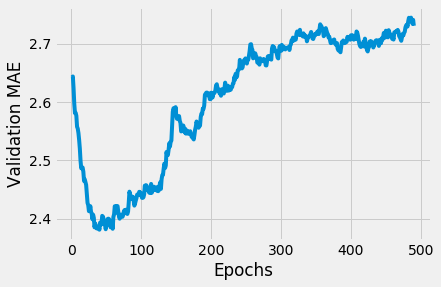

In [21]:
smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [23]:
model = build_model()
model.fit(train_data, train_labels,
         epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_labels)

102/102 [==============================] - 0s 2ms/step


In [24]:
test_mae_score

2.7614832017935957